##### Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
sns.set_style("darkgrid")

In [2]:
iris = pd.read_csv('data/iris1.csv')

##### Visualizing the data

In [3]:
iris.shape

(150, 6)

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

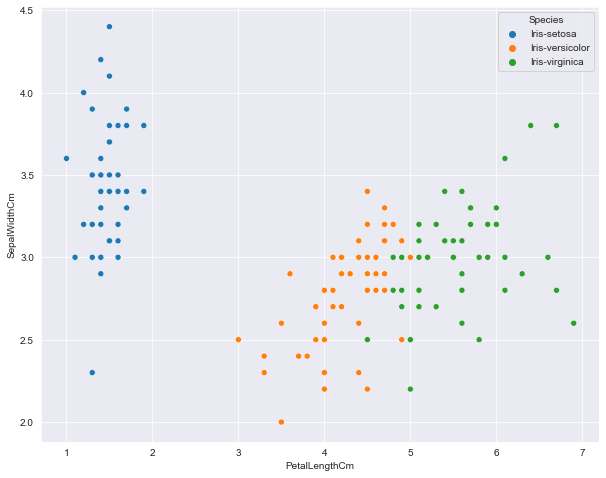

In [5]:
fig, axes = plt.subplots(figsize=(10,8))

sns.scatterplot( data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')


##### Processing the data

In [6]:
from sklearn.model_selection import train_test_split
x, y = train_test_split(iris,test_size=0.2)

In [7]:
train = x.to_numpy()
test = y.to_numpy()
xTest = []
yTest = []
xTrain = []
yTrain = []
hueTrain = []
for i in range(len(test)):
    xTest.append(test[i][3])
    yTest.append(test[i][2])
for i in range(len(train)):
    xTrain.append(train[i][3])
    yTrain.append(train[i][2])
    hueTrain.append(train[i][5])

<AxesSubplot:>

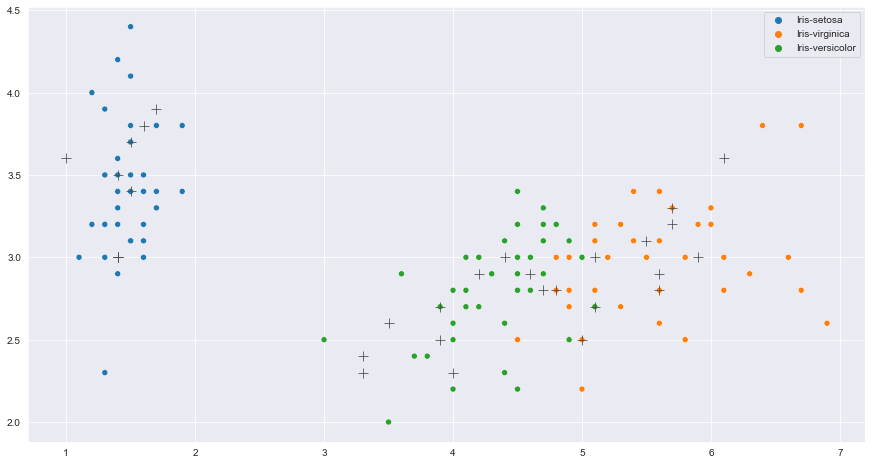

In [8]:
plt.subplots(figsize=(15,8))

sns.scatterplot(x=xTrain,y=yTrain,hue=hueTrain)
sns.scatterplot(x=xTest,y=yTest,marker="+",color="0.3",s=100)

##### Euclidian Distances

In [9]:
def distanciaEuclidiana(row1, row2):
    distancia = ((row1[2] - row2[2]) ** 2) + ((row1[3] - row2[3]) ** 2)
    return sqrt(distancia)

##### Getting the neighbors

In [10]:
def get_neighbors(train, test_row, num_neighbors):
    distances = []
    for train_row in train:
        dist = distanciaEuclidiana(test_row,train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

##### KNN Classifier

In [11]:
from collections import Counter
def KNNClassification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = Counter(output_values).most_common()[0][0]
    return prediction

###### Making Predictions

In [12]:
def predict(train, test, k):
    colunas = ["Iris-virginica","Iris-setosa","Iris-versicolor"]
    confusion_matrix = pd.DataFrame(0, index=colunas, columns=colunas)
    inputData = []
    predictedData = []
    errorLine = []

    for i in range(len(test)):
        resultado = KNNClassification(train, test[i], k)
        inputData.append(test[i][-1])
        predictedData.append(resultado)
        if(test[i][-1] != resultado):
            errorLine.append([test[i],resultado])
        confusion_matrix.loc[test[i][-1], resultado] = confusion_matrix.loc[test[i][-1], resultado] + 1
    return inputData, predictedData,confusion_matrix,errorLine

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

### K = 1

Confusion Matrix :

                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica                9            0                1
Iris-setosa                   0            9                0
Iris-versicolor               2            0                9

Acurácia:  0.9
Recall:  [1.         0.81818182 0.9       ]
Precisão:  [1.         0.9        0.81818182]
F-score:  [1.         0.85714286 0.85714286]


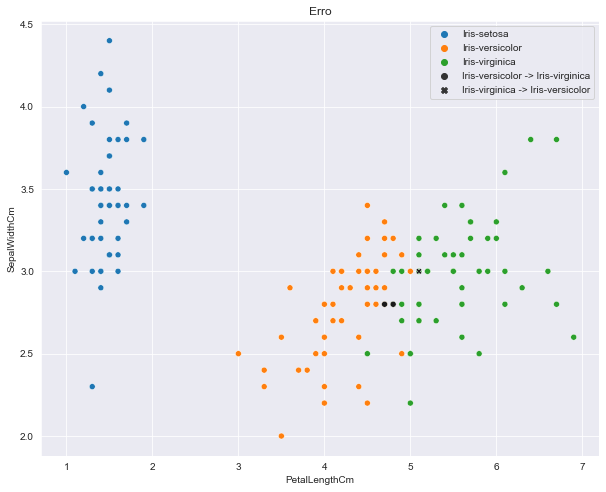

In [14]:
input1, predicted1, cm1,error = predict(train,test,1) # k = 1

print('Confusion Matrix :\n')
print(cm1)
if(len(error)):
    data = []
    x = []
    y = []
    style = []
    plt.subplots(figsize=(10,8))
    for i in range(len(error)):
        data.append(error[i][0])
        x.append(error[i][0][3])
        y.append(error[i][0][2])
        style.append(error[i][0][5]+' -> '+error[i][1])
    
    sns.scatterplot( data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')
    sns.scatterplot(data=error,x=x,y=y,color=".1",marker="s",style=style)
    plt.title("Erro")


print("\nAcurácia: ", accuracy_score(input1, predicted1))
print("Recall: ", recall_score(input1, predicted1, average=None))
print("Precisão: ", precision_score(input1, predicted1, average=None))
print("F-score: ", f1_score(input1, predicted1, average=None))

### K = 3

Confusion Matrix :

                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica               10            0                0
Iris-setosa                   0            9                0
Iris-versicolor               1            0               10

Acurácia:  0.9666666666666667
Recall:  [1.         0.90909091 1.        ]
Precisão:  [1.         1.         0.90909091]
F-score:  [1.         0.95238095 0.95238095]


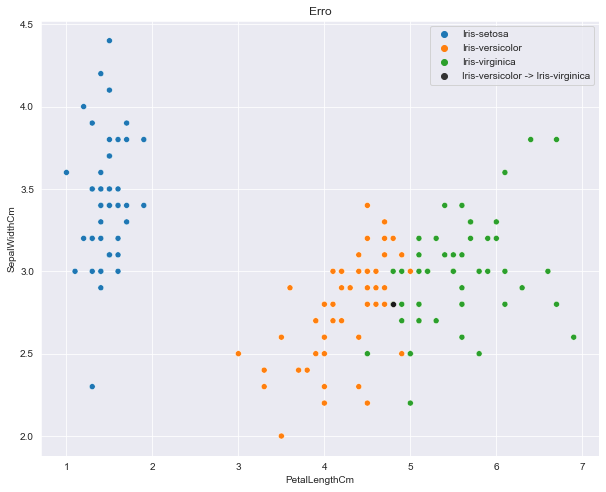

In [15]:
input3, predicted3, cm3,error = predict(train,test,3) # k = 3

print('Confusion Matrix :\n')
print(cm3)
if(len(error)):
    x = []
    y = []
    style = []
    plt.subplots(figsize=(10,8))
    for i in range(len(error)):
        x.append(error[i][0][3])
        y.append(error[i][0][2])
        style.append(error[i][0][5]+' -> '+error[i][1])
    
    sns.scatterplot( data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')
    sns.scatterplot( data=error,x=x,y=y,color=".1",marker="s",style=style)
    plt.title("Erro")

print("\nAcurácia: ", accuracy_score(input3, predicted3))
print("Recall: ", recall_score(input3, predicted3, average=None))
print("Precisão: ", precision_score(input3, predicted3, average=None))
print("F-score: ", f1_score(input3, predicted3, average=None))

### K = 5

Confusion Matrix :

                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica               10            0                0
Iris-setosa                   0            9                0
Iris-versicolor               1            0               10

Acurácia:  0.9666666666666667
Recall:  [1.         0.90909091 1.        ]
Precisão:  [1.         1.         0.90909091]
F-score:  [1.         0.95238095 0.95238095]


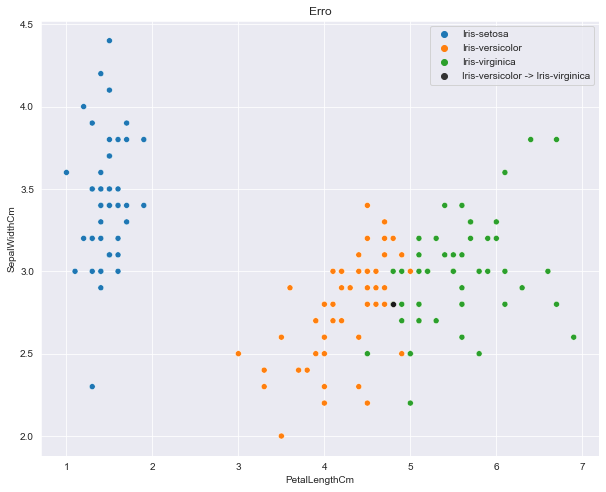

In [16]:
input5, predicted5, cm5,error = predict(train,test,5) # k = 5

print('Confusion Matrix :\n')
print(cm5)
if(len(error)):
    x = []
    y = []
    style = []
    plt.subplots(figsize=(10,8))
    for i in range(len(error)):
        x.append(error[i][0][3])
        y.append(error[i][0][2])
        style.append(error[i][0][5]+' -> '+error[i][1])
    
    sns.scatterplot( data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')
    sns.scatterplot( data=error,x=x,y=y,color=".1",marker="s",style=style)
    plt.title("Erro")

print("\nAcurácia: ", accuracy_score(input5, predicted5))
print("Recall: ", recall_score(input5, predicted5, average=None))
print("Precisão: ", precision_score(input5, predicted5, average=None))
print("F-score: ", f1_score(input5, predicted5, average=None))

### K = 7

Confusion Matrix :

                 Iris-virginica  Iris-setosa  Iris-versicolor
Iris-virginica               10            0                0
Iris-setosa                   0            9                0
Iris-versicolor               2            0                9

Acurácia:  0.9333333333333333
Recall:  [1.         0.81818182 1.        ]
Precisão:  [1.         1.         0.83333333]
F-score:  [1.         0.9        0.90909091]


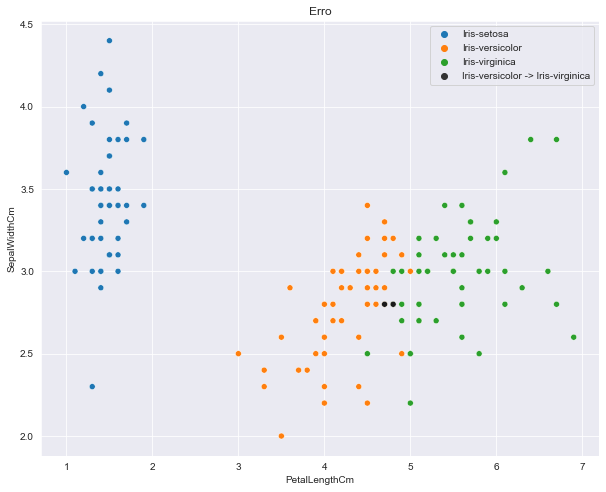

In [18]:
input7, predicted7, cm7,error = predict(train,test,7) # k = 7

print('Confusion Matrix :\n')
print(cm7)
if(len(error)):
    x = []
    y = []
    style = []
    plt.subplots(figsize=(10,8))
    for i in range(len(error)):
        x.append(error[i][0][3])
        y.append(error[i][0][2])
        style.append(error[i][0][5]+' -> '+error[i][1])
    
    sns.scatterplot( data=iris,x='PetalLengthCm',y='SepalWidthCm',hue='Species')
    sns.scatterplot(x=x,y=y,color=".1",marker="s",style=style)
    plt.title("Erro")

print("\nAcurácia: ", accuracy_score(input7, predicted7))
print("Recall: ", recall_score(input7, predicted7, average=None))
print("Precisão: ", precision_score(input7, predicted7, average=None))
print("F-score: ", f1_score(input7, predicted7, average=None))